In [1]:
import pandas as pd

# I am trying to load the data from the '2020' sheet
df = pd.read_excel('../data/race.xlsx', sheet_name='2020')

print(df.head())


                         Unnamed: 0 Total Population by Race and Ethnicity  \
0  Ward and Precinct (Updated 2022)                       Total Population   
1                              0101                                   2340   
2                              0102                                   2603   
3                              0103                                   5111   
4                              0104                                   3019   

    Unnamed: 2                 Unnamed: 3                        Unnamed: 4  \
0  White alone  Black or African American  Hispanic or Latino (of any Race)   
1         1420                         67                               652   
2          994                         81                              1303   
3         2287                        328                              1804   
4         1113                        133                              1494   

  Unnamed: 5                         Unnamed: 6  \
0    

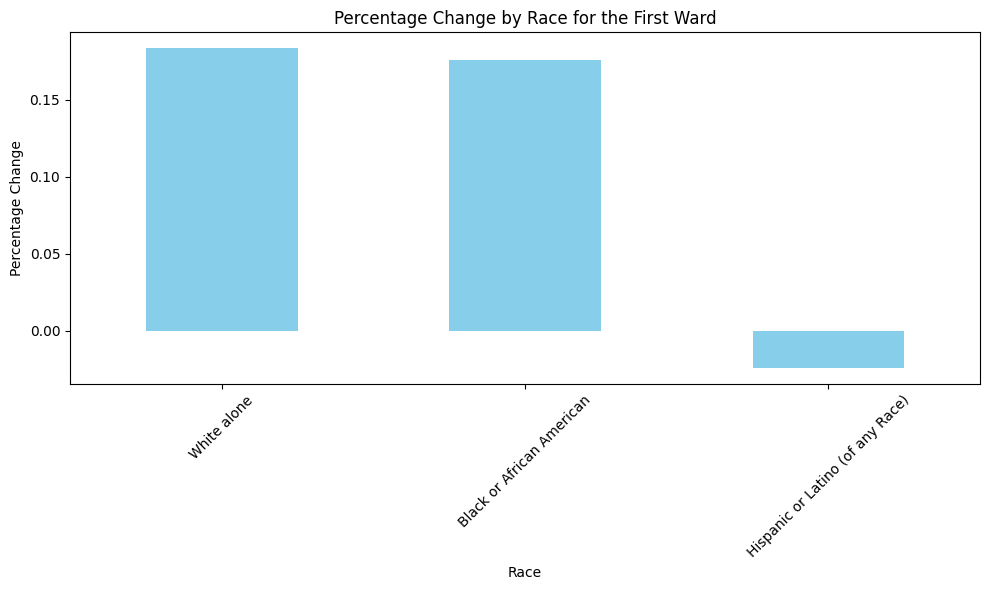

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('race.csv')

percentage_columns = df.columns[3:6]

for col in percentage_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

first_row = df.loc[0, percentage_columns]

if first_row.isnull().any():
    print("The row contains non-numeric data. Please check the input CSV.")
else:
    plt.figure(figsize=(10, 6))
    first_row.plot(kind='bar', color='skyblue')

    plt.xlabel('Race')
    plt.ylabel('Percentage Change')
    plt.title('Percentage Change by Race for the First Ward')
    plt.xticks(range(len(percentage_columns)), percentage_columns, rotation=45)  
    plt.tight_layout() 
    plt.show()


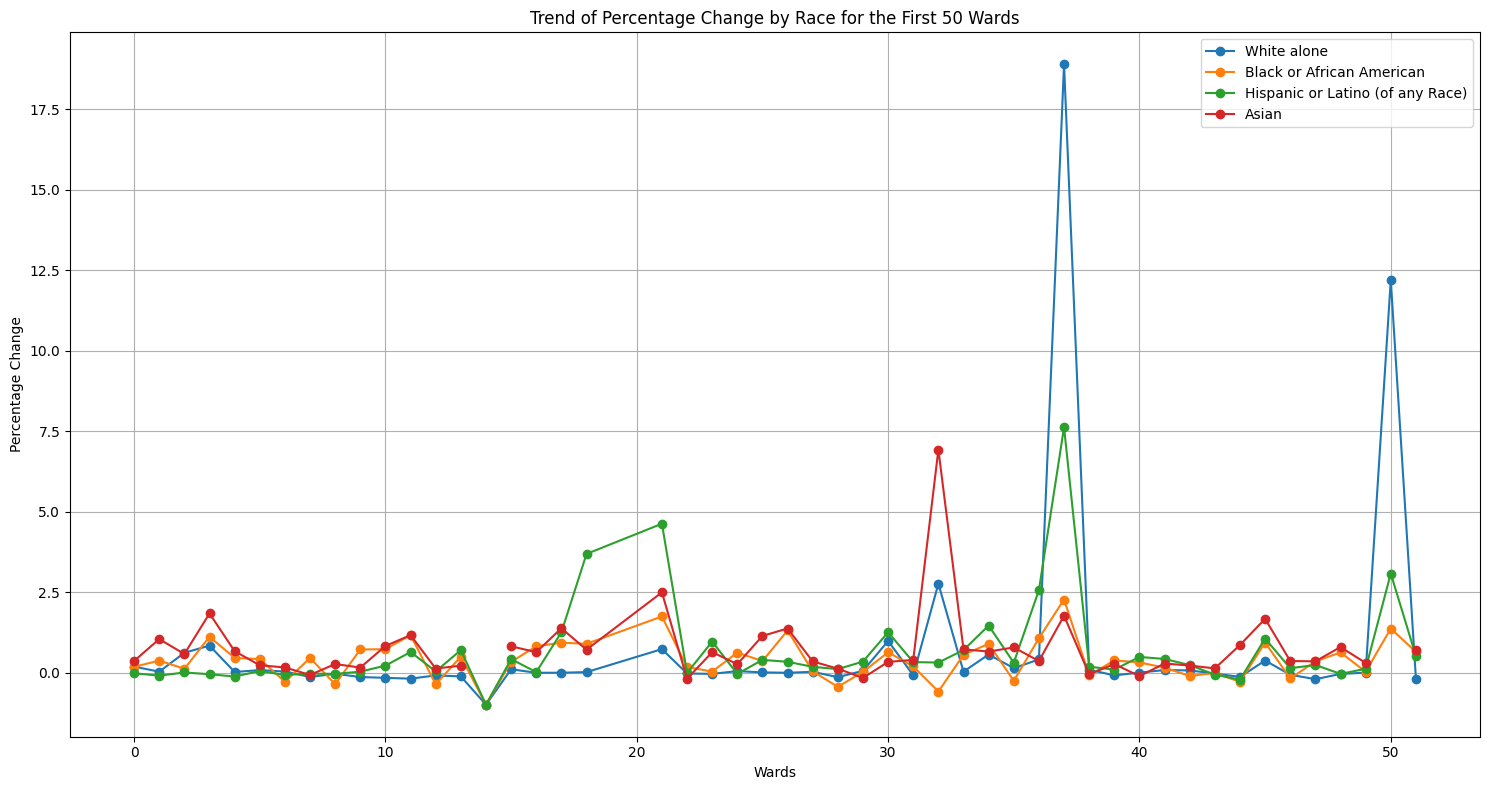

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('race.csv')
df.replace('***', pd.NA, inplace=True)  # We are replacing '***' with NaN
df.dropna(subset=df.columns[0:6], inplace=True)

ward_column = 'Ward and Precinct (Updated 2022)'
percentage_columns = [
    'White alone', 'Black or African American', 
    'Hispanic or Latino (of any Race)', 'Asian'
]

for col in percentage_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Here selecting the first 50 rows
df_first_50 = df.iloc[0:50]


plt.figure(figsize=(15, 8))
for race in percentage_columns:
    plt.plot(df_first_50.index, df_first_50[race], marker='o', label=race)


plt.xlabel('Wards')
plt.ylabel('Percentage Change')
plt.title('Trend of Percentage Change by Race for the First 50 Wards')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


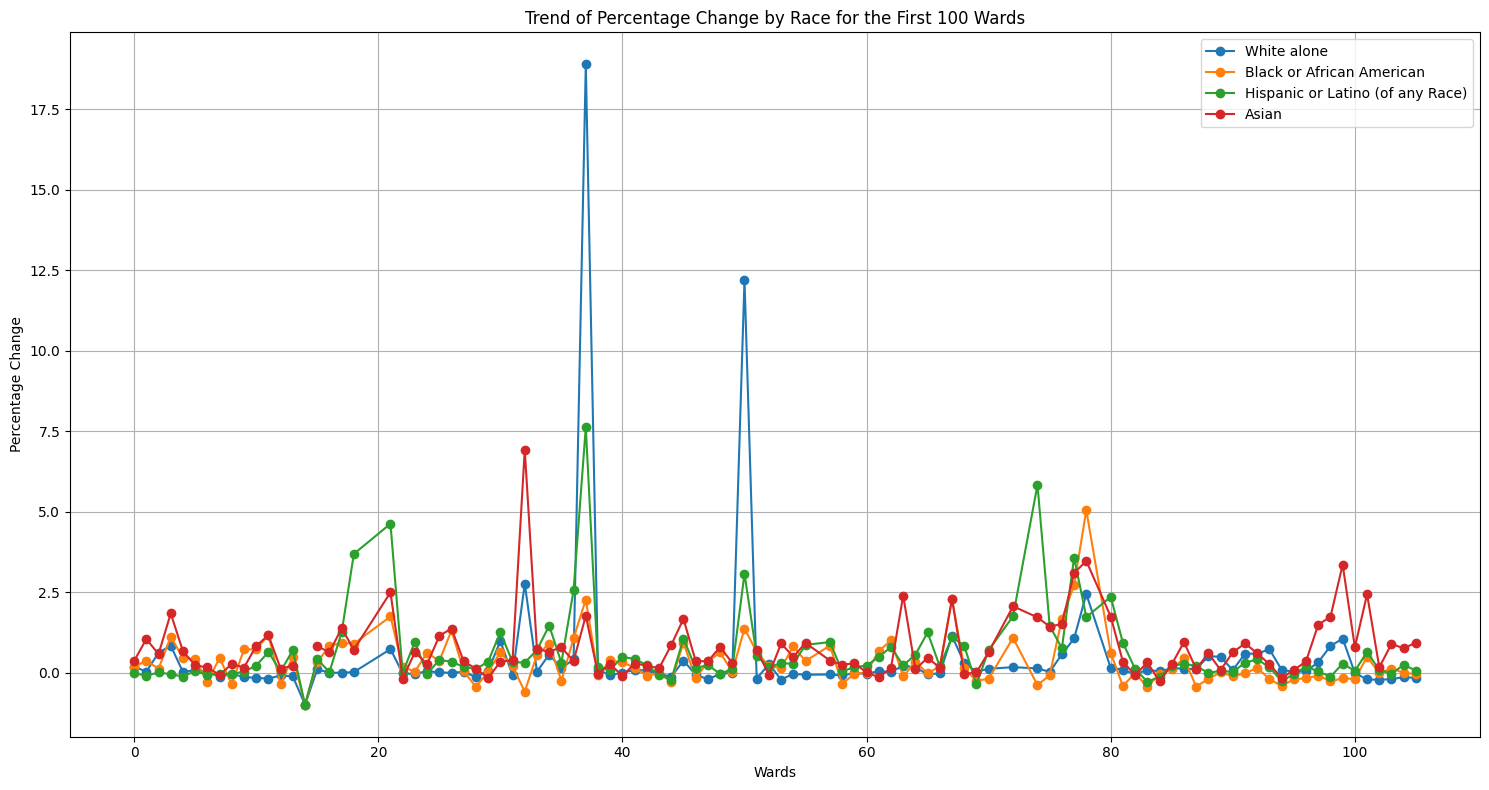

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('race.csv')
df.replace('***', pd.NA, inplace=True)  # We are replacing '***' with NaN
df.dropna(subset=df.columns[0:6], inplace=True)

ward_column = 'Ward and Precinct (Updated 2022)'
percentage_columns = [
    'White alone', 'Black or African American', 
    'Hispanic or Latino (of any Race)', 'Asian'
]

for col in percentage_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Here selecting the first 100 rows
df_first_50 = df.iloc[0:100]


plt.figure(figsize=(15, 8))
for race in percentage_columns:
    plt.plot(df_first_50.index, df_first_50[race], marker='o', label=race)


plt.xlabel('Wards')
plt.ylabel('Percentage Change')
plt.title('Trend of Percentage Change by Race for the First 100 Wards')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
Neighborhoods_dict = {1: 'East Boston',
                      2: 'Charlestown',
                      3: 'Back Bay/Beacon Hill; Downtown/South End', 
                      4: 'Back Bay/Beacon Hill; Mission Hill',
                      5: 'Back Bay/Beacon Hill; Fenway/Kenmore', 
                      6: 'South Boston', 
                      7: 'South Boston', 
                      8: 'Roxbury',
                      9: 'Downtown/North End/South End',
                      10: 'Fenway/Kenmore', 
                      11: 'Jamaica Plain/Mission Hill', 
                      12: 'Franklin Field', 
                      13: 'North Dorchester', 
                      14: 'South Dorchester', 
                      15: 'North Dorchester', 
                      16: 'South Dorchester', 
                      17: 'South Dorchester/Mattapan',
                      18: 'Hyde Park', 
                      19: 'Jamaica Plain/Mission Hill', 
                      20: 'Roslindale', 
                      21: 'Allston/Brighton', 
                      22: 'Allston/Brighton'}

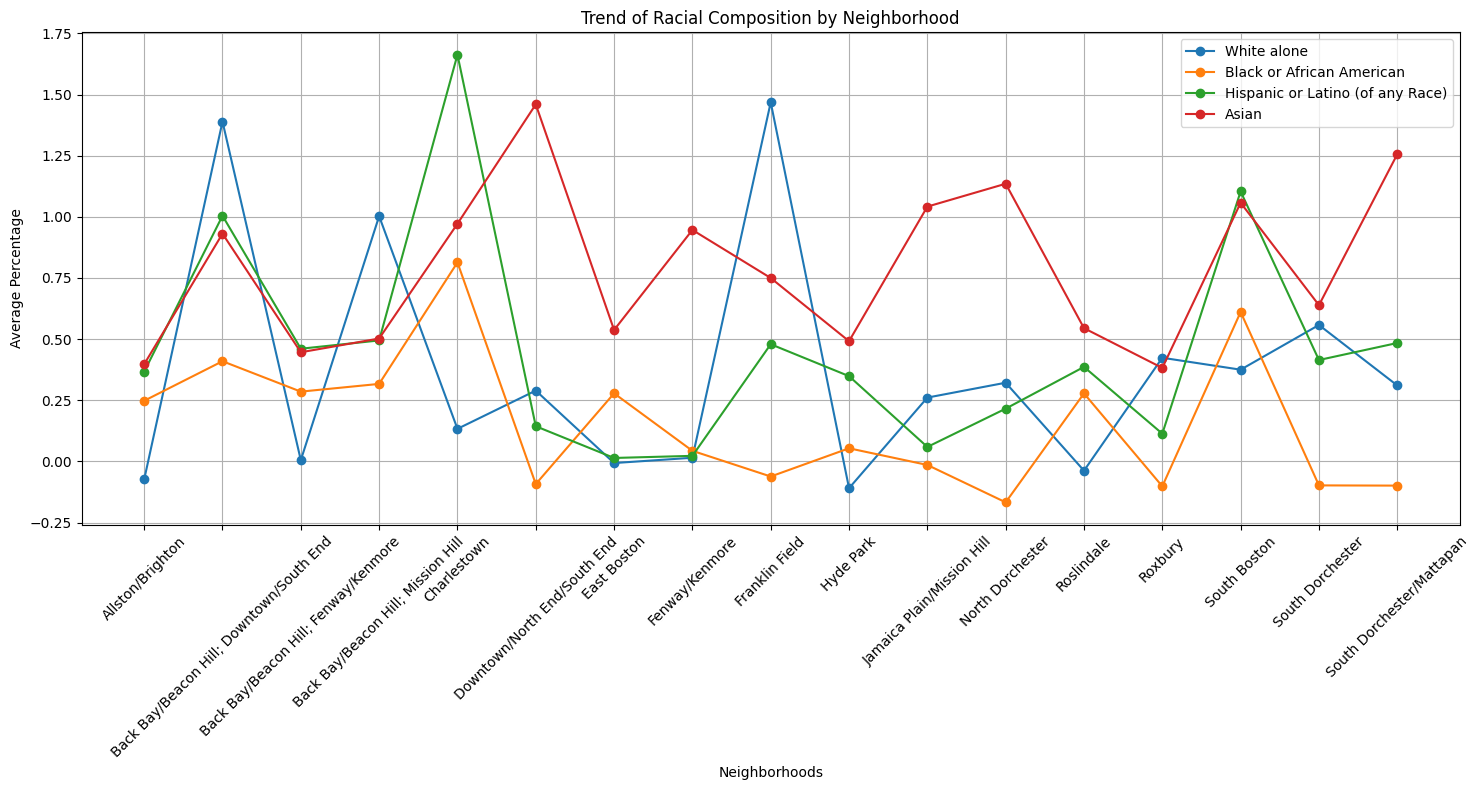

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('race.csv')
df.replace('***', pd.NA, inplace=True)
df.dropna(subset=df.columns[0:6], inplace=True)

ward_column = 'Ward and Precinct (Updated 2022)'
df['Neighborhood Code'] = df[ward_column].str.extract(r'^(\d{2})').astype(int)

df['Neighborhood'] = df['Neighborhood Code'].map(lambda x: Neighborhoods_dict.get(x, 'Unknown'))

percentage_columns = ['White alone', 'Black or African American', 'Hispanic or Latino (of any Race)', 'Asian']
for col in percentage_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

neighborhood_data = df.groupby('Neighborhood')[percentage_columns].mean()

plt.figure(figsize=(15, 8))

for race in percentage_columns:
    plt.plot(neighborhood_data.index, neighborhood_data[race], marker='o', label=race)

plt.xlabel('Neighborhoods')
plt.ylabel('Average Percentage')
plt.title('Trend of Racial Composition by Neighborhood')
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


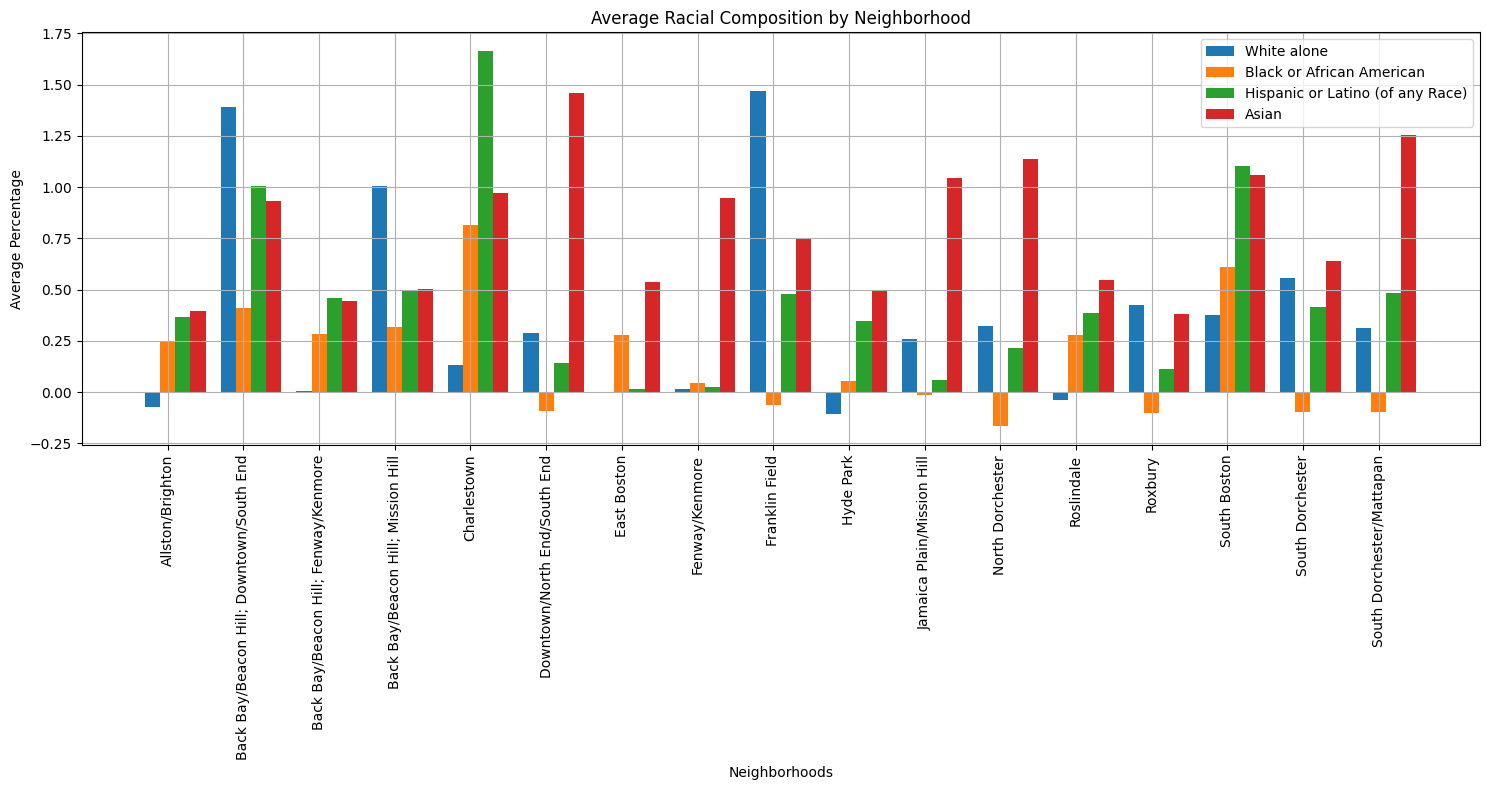

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('race.csv')
df.replace('***', pd.NA, inplace=True)
df.dropna(subset=df.columns[0:6], inplace=True)

ward_column = 'Ward and Precinct (Updated 2022)'
df['Neighborhood Code'] = df[ward_column].str.extract(r'^(\d{2})').astype(int)

df['Neighborhood'] = df['Neighborhood Code'].map(lambda x: Neighborhoods_dict.get(x, 'Unknown'))

percentage_columns = ['White alone', 'Black or African American', 'Hispanic or Latino (of any Race)', 'Asian']
for col in percentage_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

neighborhood_data = df.groupby('Neighborhood')[percentage_columns].mean()

plt.figure(figsize=(15, 8))
width = 0.2  
n = len(neighborhood_data.index)
r = np.arange(n) 

for i, race in enumerate(percentage_columns):
    plt.bar(r + i*width, neighborhood_data[race], width=width, label=race)

plt.xlabel('Neighborhoods')
plt.ylabel('Average Percentage')
plt.title('Average Racial Composition by Neighborhood')
plt.xticks(r + width, neighborhood_data.index, rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\linix\AppData\Local\Temp\ipykernel_27964\369172910.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')


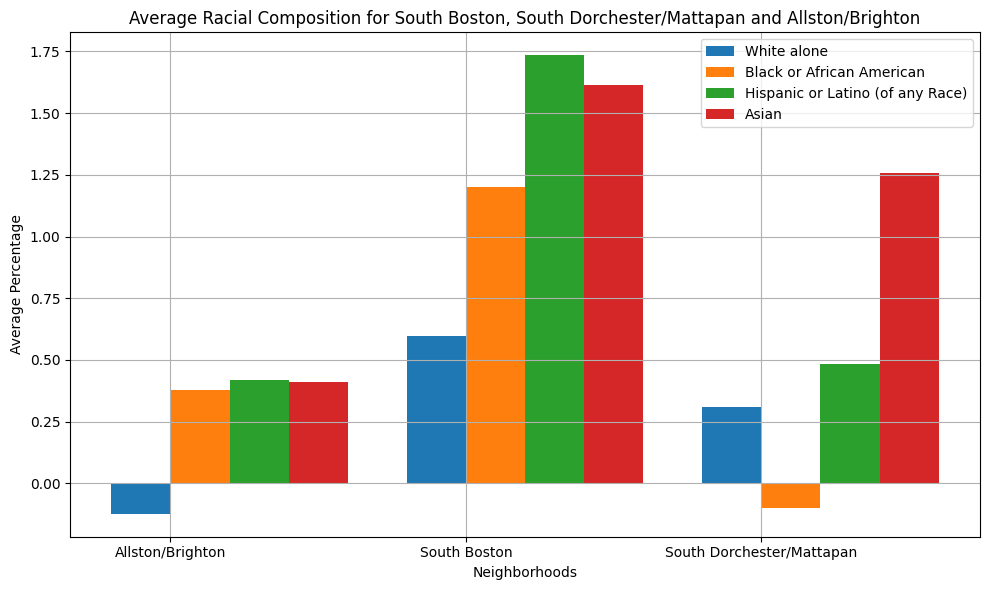

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('race.csv')
df.replace('***', pd.NA, inplace=True)
df.dropna(subset=df.columns[0:6], inplace=True)

ward_column = 'Ward and Precinct (Updated 2022)'
df['Neighborhood Code'] = df[ward_column].str.extract(r'^(\d{2})').astype(int)
Neighborhoods_dict_focused = {6: 'South Boston', 17: 'South Dorchester/Mattapan', 21: 'Allston/Brighton'}
df['Neighborhood'] = df['Neighborhood Code'].map(lambda x: Neighborhoods_dict_focused.get(x, 'Unknown'))

df_filtered = df[df['Neighborhood'].isin(['South Boston', 'South Dorchester/Mattapan', 'Allston/Brighton'])]

percentage_columns = ['White alone', 'Black or African American', 'Hispanic or Latino (of any Race)', 'Asian']
for col in percentage_columns:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')

neighborhood_data = df_filtered.groupby('Neighborhood')[percentage_columns].mean()

plt.figure(figsize=(10, 6))
width = 0.2  
n = len(neighborhood_data.index)  
r = np.arange(n)  

for i, race in enumerate(percentage_columns):
    plt.bar(r + i*width, neighborhood_data[race], width=width, label=race)

plt.xlabel('Neighborhoods')
plt.ylabel('Average Percentage')
plt.title('Average Racial Composition for South Boston, South Dorchester/Mattapan and Allston/Brighton')
plt.xticks(r + width/2, neighborhood_data.index, rotation=0)  # Adjust rotation if necessary
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


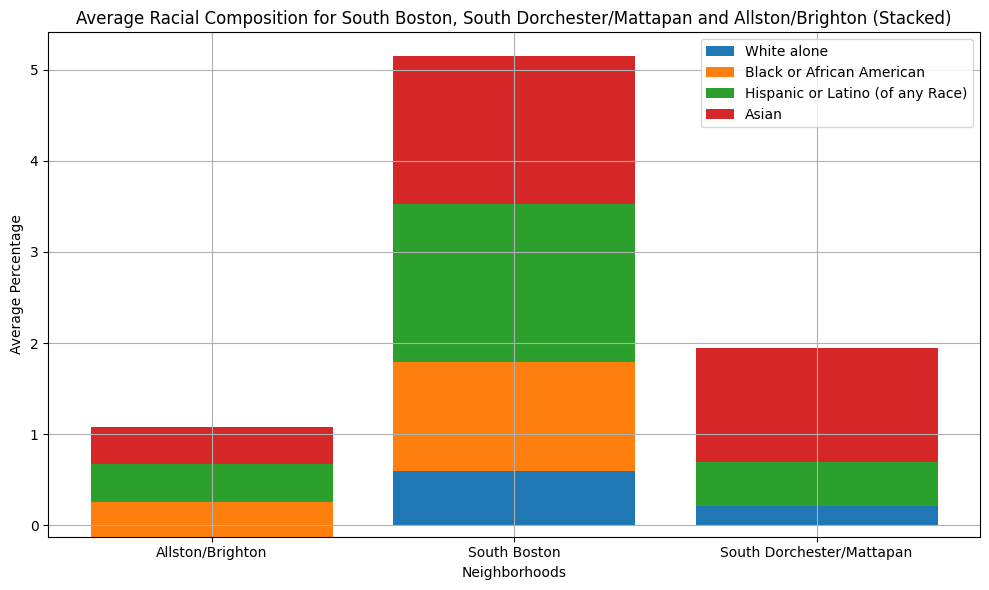

In [23]:
plt.figure(figsize=(10, 6))
bottom = np.zeros(len(neighborhood_data))  
for race in percentage_columns:
    plt.bar(neighborhood_data.index, neighborhood_data[race], bottom=bottom, label=race)
    bottom += neighborhood_data[race]  

plt.xlabel('Neighborhoods')
plt.ylabel('Average Percentage')
plt.title('Average Racial Composition for South Boston, South Dorchester/Mattapan and Allston/Brighton (Stacked)')
plt.xticks(rotation=0) 
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


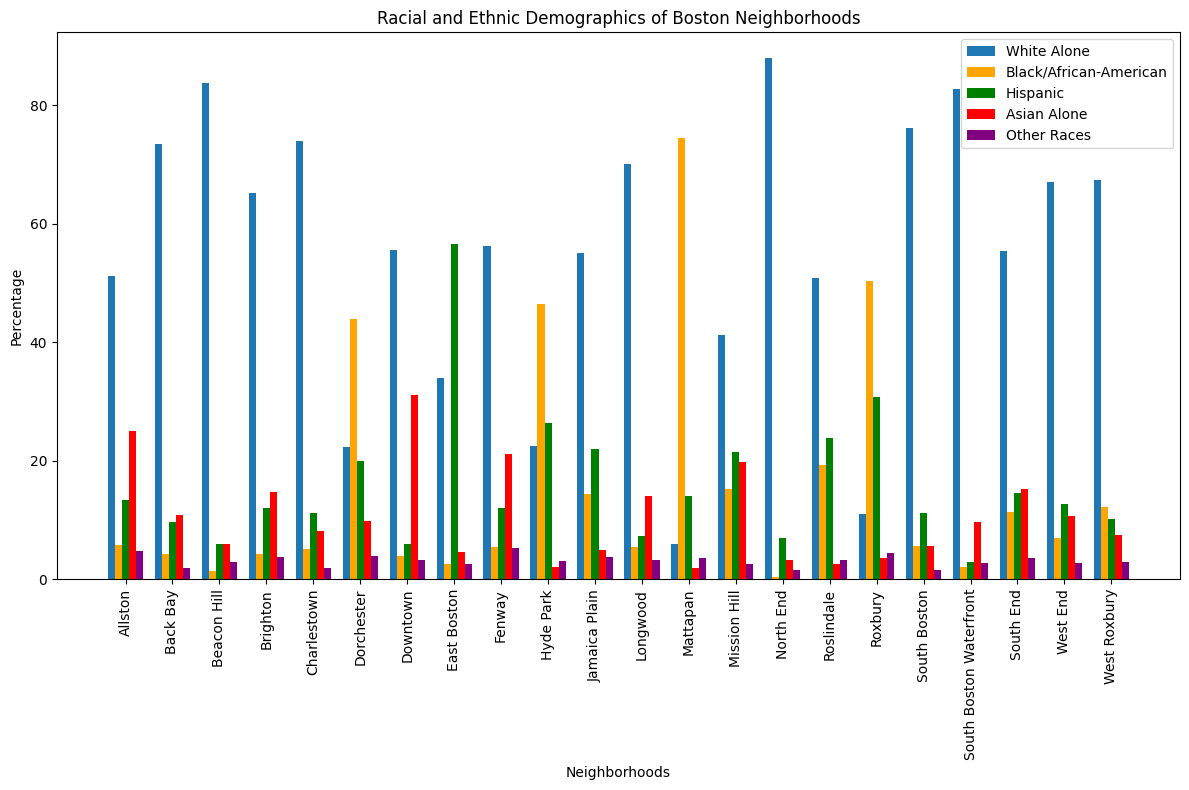

In [24]:
import matplotlib.pyplot as plt
import numpy as np

neighborhoods = ['Allston', 'Back Bay', 'Beacon Hill', 'Brighton', 'Charlestown', 'Dorchester', 'Downtown', 'East Boston', 'Fenway', 'Hyde Park', 'Jamaica Plain', 'Longwood', 'Mattapan', 'Mission Hill', 'North End', 'Roslindale', 'Roxbury', 'South Boston', 'South Boston Waterfront', 'South End', 'West End', 'West Roxbury']
white_alone = [51.1, 73.4, 83.7, 65.1, 73.9, 22.3, 55.6, 33.9, 56.3, 22.4, 55.1, 70.0, 6.0, 41.2, 87.9, 50.9, 11.0, 76.2, 82.7, 55.4, 67.0, 67.4]
black_african_american = [5.7, 4.3, 1.4, 4.3, 5.1, 44.0, 4.0, 2.5, 5.4, 46.4, 14.3, 5.4, 74.4, 15.3, 0.3, 19.3, 50.3, 5.6, 2.1, 11.3, 7.0, 12.2]
hispanic = [13.4, 9.6, 6.0, 12.1, 11.1, 19.9, 6.0, 56.5, 12.0, 26.3, 22.0, 7.3, 14.1, 21.4, 7.0, 23.9, 30.7, 11.1, 2.9, 14.5, 12.7, 10.1]
asian_alone = [25.0, 10.8, 6.0, 14.8, 8.1, 9.9, 31.1, 4.6, 21.1, 2.0, 4.9, 14.1, 1.9, 19.7, 3.3, 2.5, 3.5, 5.6, 9.7, 15.3, 10.7, 7.5]
other_races = [4.8, 1.9, 2.9, 3.7, 1.9, 4.0, 3.3, 2.6, 5.2, 3.0, 3.7, 3.2, 3.6, 2.5, 1.5, 3.3, 4.5, 1.5, 2.7, 3.6, 2.7, 2.9]

bar_width = 0.15

index = np.arange(len(neighborhoods))

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(index - 2*bar_width, white_alone, bar_width, label='White Alone')
ax.bar(index - bar_width, black_african_american, bar_width, label='Black/African-American', color='orange')
ax.bar(index, hispanic, bar_width, label='Hispanic', color='green')
ax.bar(index + bar_width, asian_alone, bar_width, label='Asian Alone', color='red')
ax.bar(index + 2*bar_width, other_races, bar_width, label='Other Races', color='purple')

ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Percentage')
ax.set_title('Racial and Ethnic Demographics of Boston Neighborhoods')
ax.set_xticks(index)
ax.set_xticklabels(neighborhoods)
ax.legend()

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

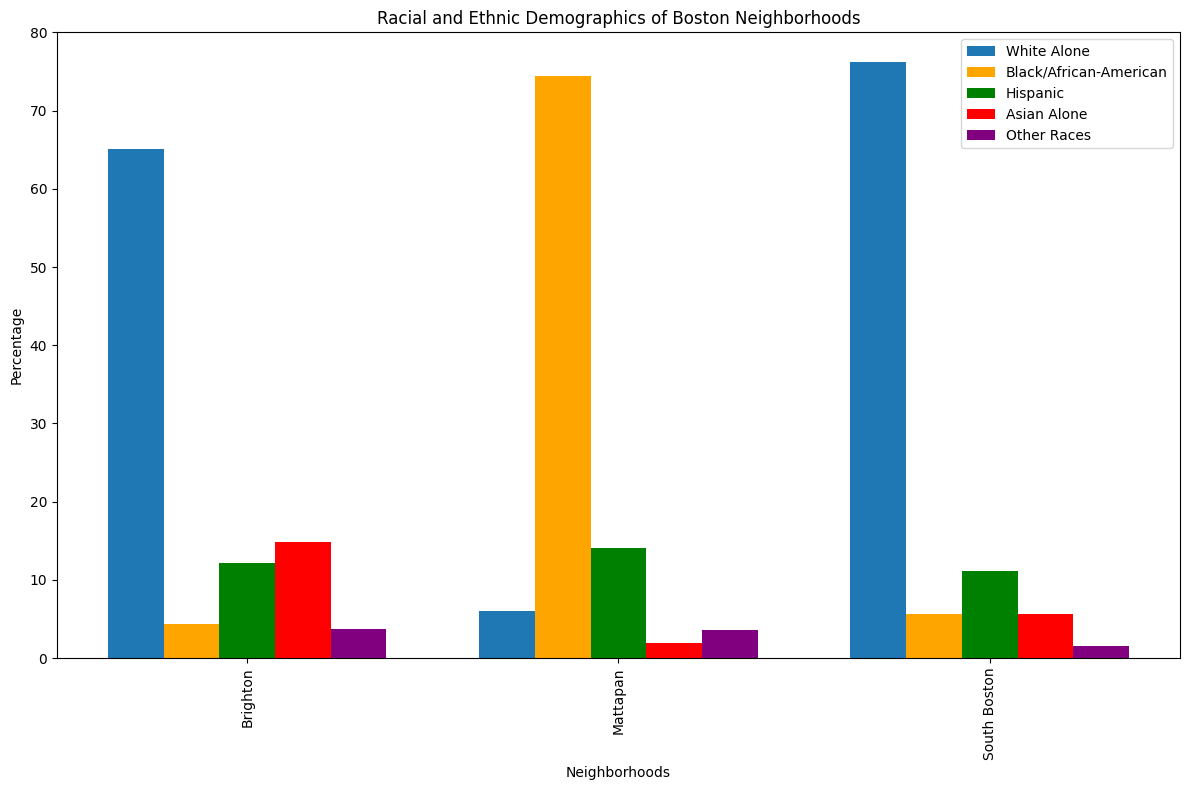

In [25]:
import matplotlib.pyplot as plt
import numpy as np

neighborhoods = ['Brighton', 'Mattapan','South Boston']
white_alone = [65.1, 6.0, 76.2]
black_african_american = [4.3, 74.4, 5.6]
hispanic = [12.1, 14.1, 11.1]
asian_alone = [14.8, 1.9, 5.6]
other_races = [3.7, 3.6, 1.5]

bar_width = 0.15

index = np.arange(len(neighborhoods))

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(index - 2*bar_width, white_alone, bar_width, label='White Alone')
ax.bar(index - bar_width, black_african_american, bar_width, label='Black/African-American', color='orange')
ax.bar(index, hispanic, bar_width, label='Hispanic', color='green')
ax.bar(index + bar_width, asian_alone, bar_width, label='Asian Alone', color='red')
ax.bar(index + 2*bar_width, other_races, bar_width, label='Other Races', color='purple')

ax.set_xlabel('Neighborhoods')
ax.set_ylabel('Percentage')
ax.set_title('Racial and Ethnic Demographics of Boston Neighborhoods')
ax.set_xticks(index)
ax.set_xticklabels(neighborhoods)
ax.legend()

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()